# Applied Time Series Analysis

# Chapter 1: Introduction

Time series data: records measured sequentially in time. Examples: stock prices, weather, sales, etc.

Time series are serially correlated unlike the basic data analysis that assues that the data is independent. We want to visualize these correlations and dependencies and use them to make predictions for the future. 

We can use some simple analysis, however a full analysis involves using **stochastic mechanism that is assumed to the generator of the data**.

## 1.1 Time Series Data

The main features of time series data are: *trend and seasonality..* which can be modelled deterministically using mathematical functions of time or (stochastically) non-parametrically using smoothing approaches.

Another key feauture is that the data is serially correlated, meaning that adjacent values are more similar than values that are far apart. This is also called **autocorrelation**.

## 1.2 Examples of Time Series Data

In [18]:
# load libraries
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
from pmdarima.datasets import load_lynx


### 1.2.1 Air Passenger Bookings

In [2]:

# download dataset (easier to do in terminal)
# od.download(
#     'https://www.kaggle.com/datasets/rakannimer/air-passengers'
#     )

In [3]:
# load dataset
passengers = pd.read_csv("./_data/AirPassengers.csv")
passengers['Month'] = pd.to_datetime(passengers['Month'])
passengers.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


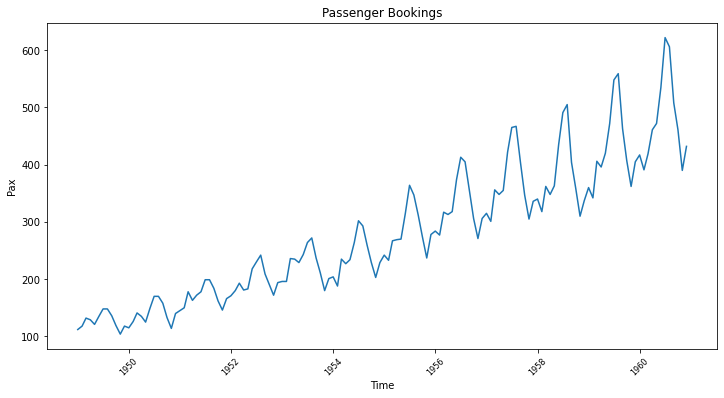

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(passengers['Month'], passengers['#Passengers'])
plt.title('Passenger Bookings')
plt.xlabel('Time')
plt.ylabel('Pax')
plt.xticks(rotation=45, fontsize=8)
plt.show()

- Number of passengers tend to increase over time
- Change in the mean level that is not **periodic** (seasonal) is known as a **trend**
- Repeating pattern within each year; more passengers in summer than winter. This is know is **seasonality** or **seasonal effect**.
- Increasing trend can be attributed to the increasing population, number of aircrafts, rising prosperity, etc. Seasonal variation can be attributed to the vacation periods, school holidays, etc. Therefore, both trend and seasonality are **deterministic** components of the time series.

### 1.2.2 Lynx Trappings

In [5]:
# load dataset
lynx_array = load_lynx(as_series = False)
lynx_index = pd.date_range('1821', periods=len(lynx_array), freq='A')
lynx_data = pd.DataFrame(data=lynx_array, index=lynx_index, columns=["lynx"])
lynx_data.head()

,lynx
1821-12-31,269.0
1822-12-31,321.0
1823-12-31,585.0
1824-12-31,871.0
1825-12-31,1475.0


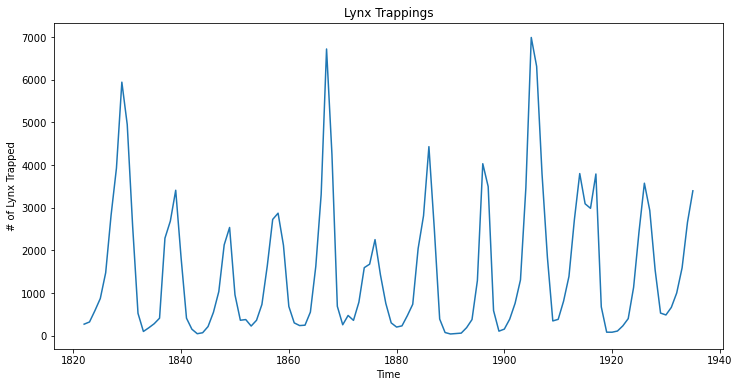

In [6]:
# plot timeseries
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(lynx_data.index, lynx_data['lynx'])
ax.set_title('Lynx Trappings')
ax.set_xlabel('Time')
ax.set_ylabel('# of Lynx Trapped')
plt.show()


- Number of lynx trapped peaks and declines at low values in about 10 year cycles, and some larger figur every 40 years.
- "This suggests that the prominent periodicity is to be interpreted as *random*, but not deterministic."
- Most time series analysis is aimed stationary series; i.e. *data that do not show deterministic, but only random (cyclic) variation.*
- Observations are clearly serially correlated, a value is most likely to be similar as the previous value.

### 1.2.3 Luteinizing Hormone Measurements

In [7]:
# read in the data
lh = pd.read_csv("./_data/lh.csv", names= ['time', 'lh'], header=0)
lh.head()

,time,lh
0,1,2.4
1,2,2.4
2,3,2.4
3,4,2.2
4,5,2.1


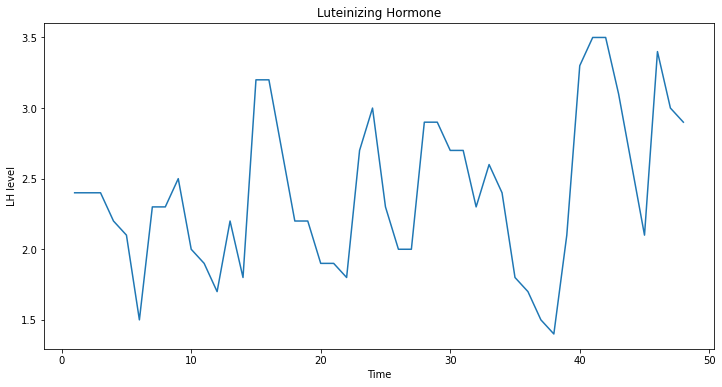

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.plot(lh['time'], lh['lh'])
ax.set_title('Luteinizing Hormone')
ax.set_xlabel('Time')
ax.set_ylabel('LH level')
plt.show()

- No deterministic seasonal pattern, data was collected in 10 minutes intervals
- Stochastic cyclic behavior? Let's visualize autocorrelation for lag 1 with a scatter plot below:

In [9]:
lh.head()

,time,lh
0,1,2.4
1,2,2.4
2,3,2.4
3,4,2.2
4,5,2.1


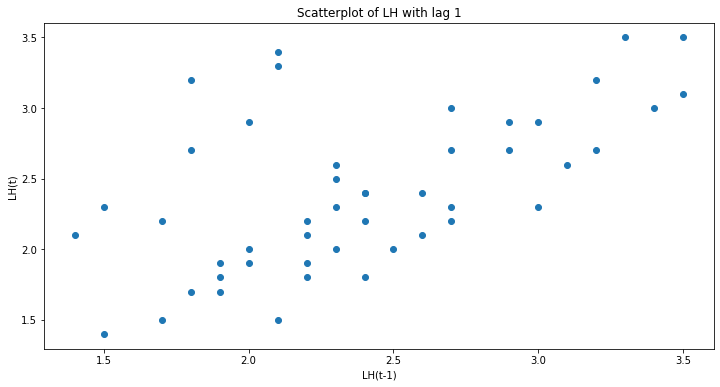

In [10]:
# scatter plot with lag 1
plt.figure(figsize=(12, 6))
plt.scatter(lh['lh'].shift(1), lh['lh'])
plt.title("Scatterplot of LH with lag 1")
plt.xlabel("LH(t-1)")
plt.ylabel("LH(t)")
plt.show()

- Positive correlation between current and previous measurements
- The correlation is not perfect, but it is strong enough to suggest that the data is serially correlated. 

We can also calculate the correlation coefficient:

In [11]:
# correlation coefficient
lh['lh'].shift(1).corr(lh['lh'])

0.5807321624769066

This is the *autocorrelation coefficient at lag 1*, which is high suggesting serial correlation.

### 1.2.4 Swiss Market Index

In [16]:
# get data
smi = pd.read_csv("./_data/EuStockMarkets.csv", index_col=0)
smi.head()  # data not giving years column, come back to this

,DAX,SMI,CAC,FTSE,time
1,1628.75,1678.1,1772.8,2443.6,1991.496154
2,1613.63,1688.5,1750.5,2460.2,1991.500000
3,1606.51,1678.6,1718.0,2448.2,1991.503846
4,1621.04,1684.1,1708.1,2470.4,1991.507692
5,1618.16,1686.6,1723.1,2484.7,1991.511538


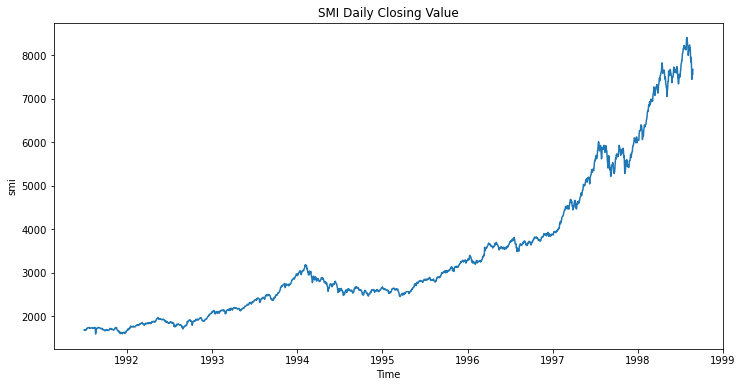

In [17]:
# subset just smi
smi = smi[['SMI', 'time']]
smi.head()
plt.figure(figsize=(12, 6))
plt.plot(smi['time'], smi['SMI'])
plt.title('SMI Daily Closing Value')
plt.xlabel('Time')
plt.ylabel('smi')
plt.show()

In [19]:
## log returns (approximation of log reuturns -- percentage change -- with respect to previous day)
smi['log_returns'] = np.log(smi['SMI']).diff()
smi.head()

,SMI,time,log_returns
1,1678.1,1991.496154,NaN
2,1688.5,1991.500000,0.006178
3,1678.6,1991.503846,-0.005880
4,1684.1,1991.507692,0.003271
5,1686.6,1991.511538,0.001483


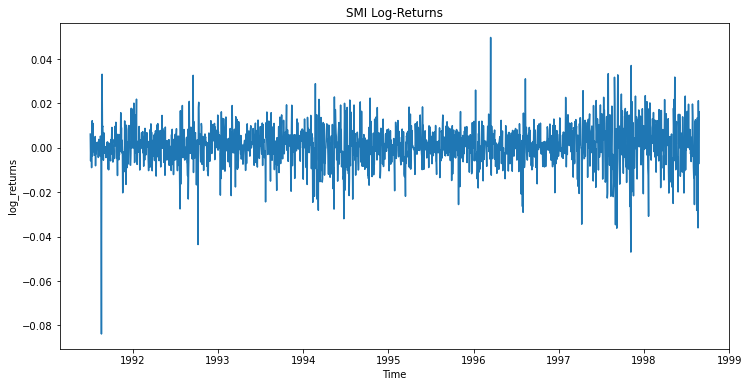

In [20]:
## plot log returns
plt.figure(figsize=(12, 6))
plt.plot(smi['time'], smi['log_returns'])
plt.title('SMI Log-Returns')
plt.xlabel('Time')
plt.ylabel('log_returns')
plt.show()

- No autocorrelation in the log returns, can we detect it using lag 1?

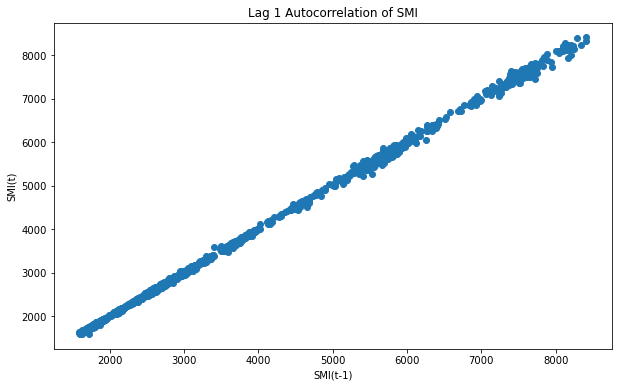

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(smi['SMI'].shift(1), smi['SMI'])
plt.xlabel('SMI(t-1)')
plt.ylabel('SMI(t)')
plt.title('Lag 1 Autocorrelation of SMI')
plt.show()

???? there is huge serial correlation. The book says that there is no correlation. 

In [30]:
smi['SMI'].shift(1).corr(smi['SMI'])  # OMG, it is insanely high 
#(PAGE 8 OF THE BOOK -- COME BACK TO IT)

0.9997120771990303

In [31]:
# MAY BE MEANT LOG RETURNS?
smi['log_returns'].shift(1).corr(smi['log_returns'])    # oh I see, it is the log returns

0.0476984829858934

This also makes sense because we are not looking at the correlation between the current and previous stock value, but the correlation between the returns day after day. 

## 1.3 Goals in time series analysis

### 1.3.1 Exploratory analysis
- Visualize the data
- Decomposition of the series into deterministic and stochastic components
- Study dependency structure in the data

### 1.3.2 Modelling
- Formulation of a stochastic model for the data --> leads to deeper understanding of the time series
- Mixture of background knowledge and EDA
- Estimation of the model parameters, model diagnostics and evalution

### 1.3.3 Forecasting
- Prediction of future values
- Usually relies on extrapolation, assuming that past and present characteristic will continue in the future
- Need good understanding of the series

### 1.3.4 Time Series Regression


